In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from pandas.core.groupby.groupby import DataError

## **Read the Data**

In [68]:
data=pd.read_csv("/content/train.csv")

In [69]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [70]:
data.shape

(614, 13)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## **Data Analysis and EDA** 

### **Traget Variable**

In [72]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [73]:
data['Loan_Status'].describe()

count     614
unique      2
top         Y
freq      422
Name: Loan_Status, dtype: object

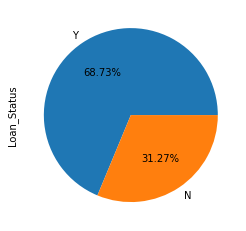

In [74]:
data['Loan_Status'].value_counts().plot.pie(labels=data['Loan_Status'].unique(),autopct = '%1.2f%%')
plt.show()

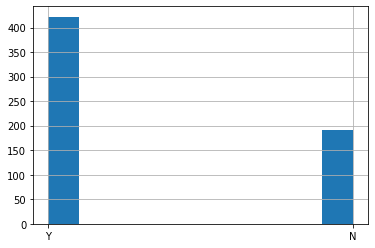

In [75]:
data['Loan_Status'].hist()

### **Features Analysis**


Now lets visualize each variable separately. Different types of variables are Categorical, ordinal and numerical.


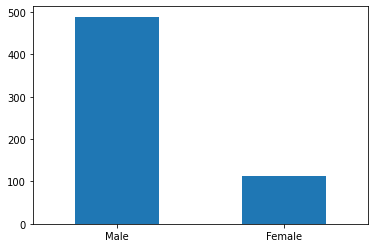

In [76]:
data['Gender'].value_counts(sort=False).plot.bar(rot=0)

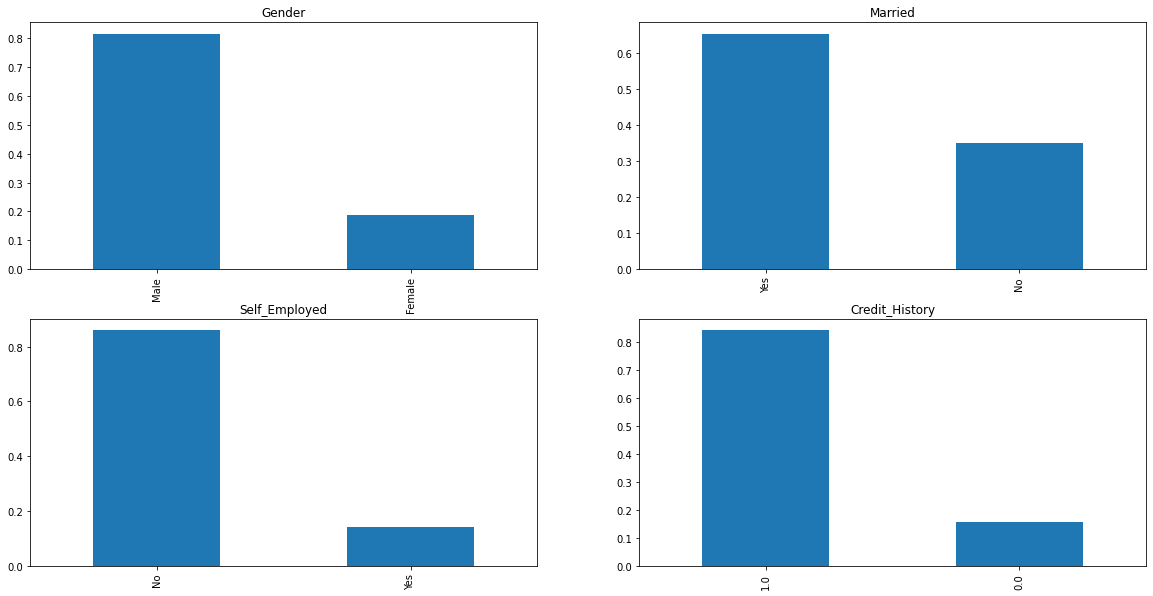

In [77]:
plt.figure(1)
plt.subplot(221)
data['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')

plt.subplot(222)
data['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Married')

plt.subplot(223)
data['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Self_Employed')

plt.subplot(224)
data['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Credit_History')



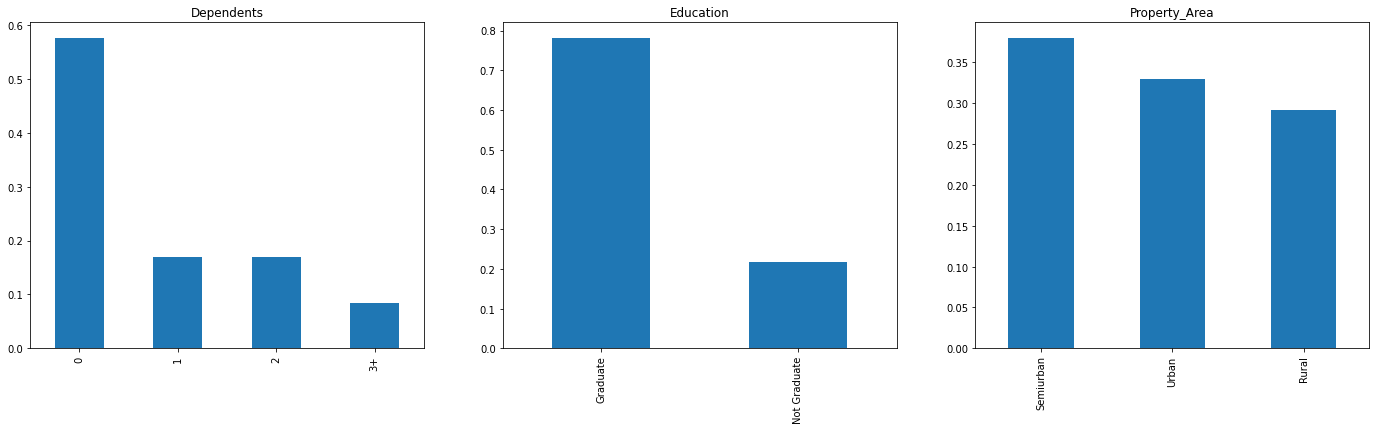

In [78]:
plt.figure(1)
plt.subplot(131)
data['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents')

plt.subplot(132)
data['Education'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Education')

plt.subplot(133)
data['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Property_Area')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7eddaa1070>,
      dtype=object)

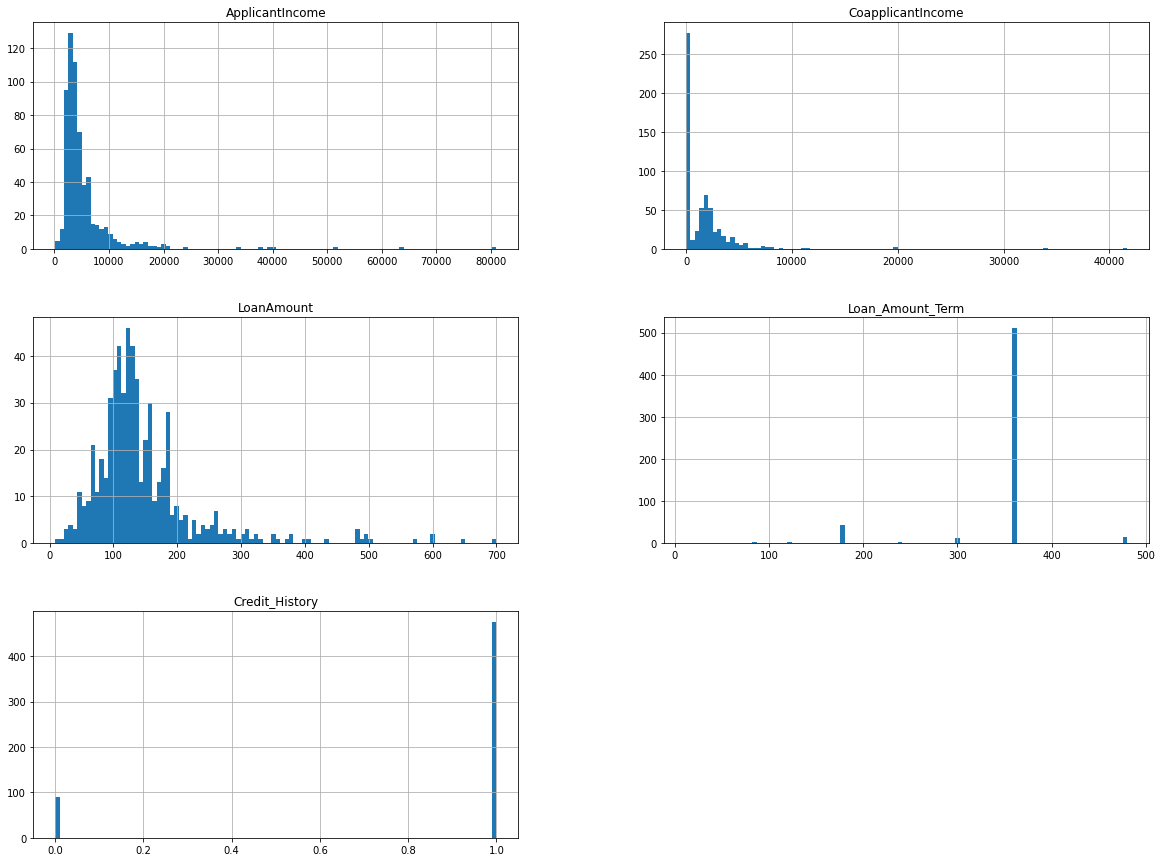

In [79]:
data.hist(bins=100, figsize=(20,15))

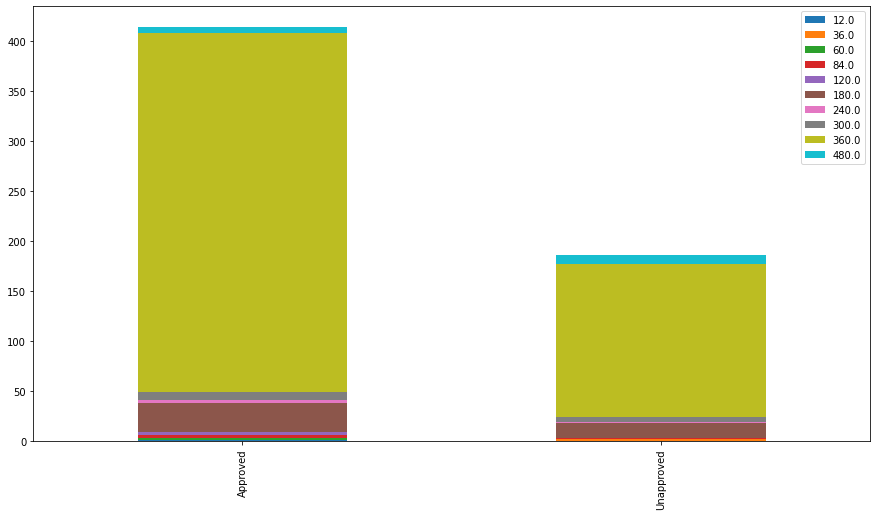

In [80]:
approved_term = data[data['Loan_Status']=='Y']['Loan_Amount_Term'].value_counts()
unapproved_term = data[data['Loan_Status']=='N']['Loan_Amount_Term'].value_counts()
df = pd.DataFrame([approved_term,unapproved_term])
df.index = ['Approved','Unapproved']
df.plot(kind='bar', stacked=True, figsize=(15,8))

### **Missing Values**

In [81]:
null=data.isnull().sum()
null

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [82]:
data.apply(lambda x: sum(x.isnull()),axis=0) # checking missing values in each column of train dataset

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [83]:
total=data.isnull().sum().sort_values()
precent=(null / data.isnull().count()).sort_values(ascending=False)

In [84]:
missing=pd.concat([total,precent],axis=1,keys=['Total','Percent'])
missing

,Total,Percent
Loan_ID,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000
CoapplicantIncome,0,0.000000
Property_Area,0,0.000000
Loan_Status,0,0.000000
Married,3,0.004886
Gender,13,0.021173
Loan_Amount_Term,14,0.022801
Dependents,15,0.024430


In [85]:
data.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [86]:
data.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

## **Feature Engineering**

### **For categorical variables: imputation using mode**

In [87]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

In [88]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [90]:
data.apply(lambda x: sum(x.isnull()),axis=0) # checking missing values in each column of train dataset

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [91]:
data.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

### **For numerical variables: imputation using mean or median**

In [92]:
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(), inplace=True)

In [93]:
data.Loan_Amount_Term.value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [94]:
data.apply(lambda x: sum(x.isnull()),axis=0) # checking missing values in each column of train dataset

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [95]:
data.isnull().all().sum()

0

In [96]:
# print datatypes for each variables
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### **Transforming Categorical Data**



In [97]:
string_columns=data.select_dtypes(include=['object'])
string_columns.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [98]:
data['Dependents'] = data['Dependents'].str.rstrip('+')
data['Gender'] = data['Gender'].map({'Female':0,'Male':1}).astype(np.int)
data['Married'] = data['Married'].map({'No':0, 'Yes':1}).astype(np.int)
data['Education'] = data['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(np.int)
data['Self_Employed'] = data['Self_Employed'].map({'No':0, 'Yes':1}).astype(np.int)
data['Loan_Status'] = data['Loan_Status'].map({'N':0, 'Y':1}).astype(np.int)
data['Dependents'] = data['Dependents'].astype(np.int)

<ipython-input-98-97de97f93b71>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['Gender'] = data['Gender'].map({'Female':0,'Male':1}).astype(np.int)
<ipython-input-98-97de97f93b71>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional infor

In [111]:
data['Property_Area'] = data['Property_Area'].map({'Rural':0, 'Semiurban':3,'Urban':2}).astype(np.int)

<ipython-input-111-9a7ddb8d26d2>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['Property_Area'] = data['Property_Area'].map({'Rural':0, 'Semiurban':3,'Urban':2}).astype(np.int)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


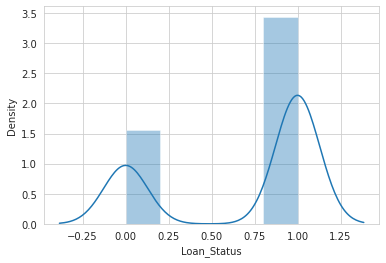

In [112]:
#histogram
sns.distplot(data['Loan_Status'])

In [113]:
print("Skewness: %f" %data['Loan_Status'].skew())

Skewness: -0.809998


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


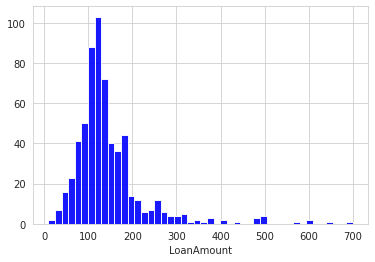

In [114]:
sns.distplot(data['LoanAmount'], kde = False, color = 'b', hist_kws={'alpha': 0.9})

In [115]:
string_columns.drop(['Loan_ID'],axis=1)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


In [116]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [117]:
df_train=data.drop(['Loan_ID'],axis=1)
df_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [118]:
df_train['Property_Area']

0      2
1      0
2      2
3      2
4      2
      ..
609    0
610    0
611    2
612    2
613    3
Name: Property_Area, Length: 614, dtype: int64

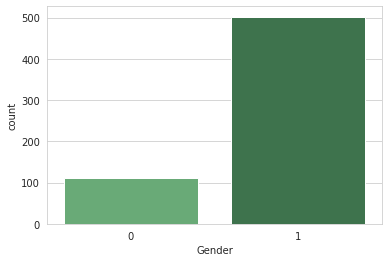

In [119]:
sns.countplot(x="Gender", data=data, palette="Greens_d")

In [120]:
df=data.drop(['Loan_ID'],axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [121]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


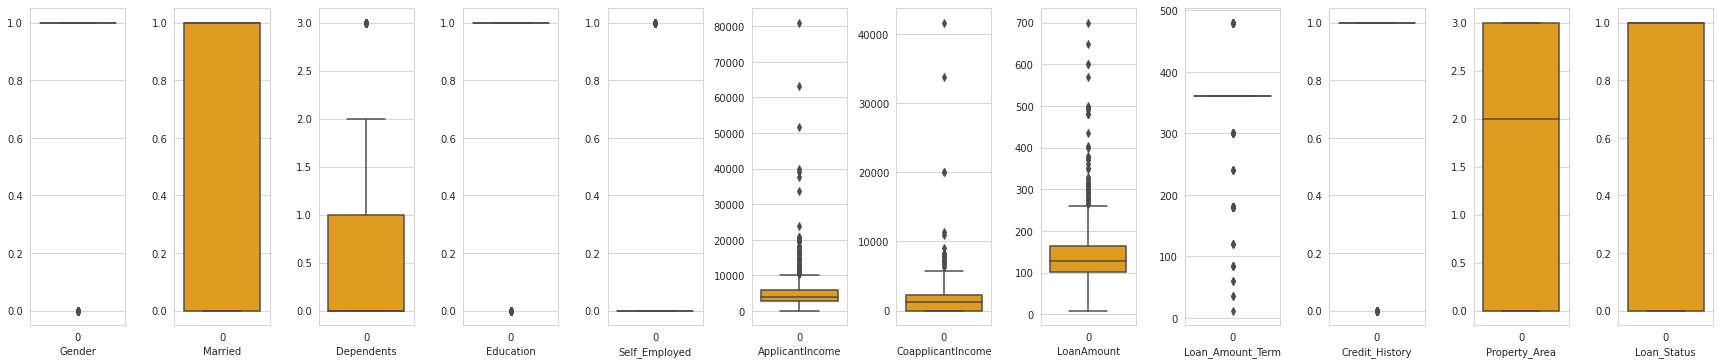

In [122]:
l = df.columns.values
num_cols=13
num_rows = len(l)-1/num_cols
plt.figure(figsize=(num_cols * 2, 5*num_rows))
for i in range(0,len(l)):
    plt.subplot(num_rows + 1, num_cols, i+1)
    sns.set_style('whitegrid')
    ax=sns.boxplot(data=df[l[i]], color='orange', orient='v')
    ax.set_xlabel(df.columns[i])
    plt.tight_layout()

## **Modelling**

In [123]:
models = []
Accuracy={}

In [124]:
#Area under Curve  to evaluate the quality of a binary classification model
#by measuring the area as much the model closer to the ideal model will be great model 
def ROC_curve(ytest,ypred):
  FPR, TPR, _ = metrics.roc_curve(ytest,  ypred)
  auc = metrics.roc_auc_score(ytest, ypred)
  #create ROC curve
  plt.plot(FPR,TPR,label="AUC="+str(auc))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc=4)
  plt.show()

### **Split Data**

In [125]:
X_train=df_train.drop('Loan_Status',axis=1)
Y=df_train.iloc[:,-1]
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2


In [126]:
X_train.shape,Y.shape

((614, 11), (614,))

In [127]:
#split the data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X_train, Y, test_size=0.2, random_state=0,shuffle=True)

###**Logistic Regression**

In [128]:
# df_test

In [129]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
LR_y_pred = LR_model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [130]:
#Scoring the model on training_data
print(f'Training Accuracy\t: {LR_model.score(X_train, y_train)*100} %')

#Scoring the model on testing_data
print(f'Training Accuracy\t: {LR_model.score(X_test,y_test)*100} %')

Training Accuracy	: 80.65173116089613 %
Training Accuracy	: 82.92682926829268 %


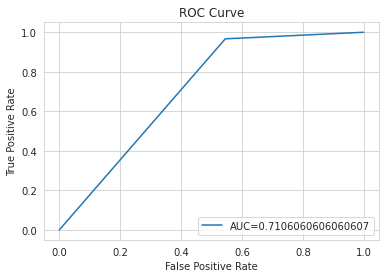

In [131]:
ROC_curve(y_test,LR_y_pred) #Area under Curve  to evaluate the quality of LR model AUC=80.68

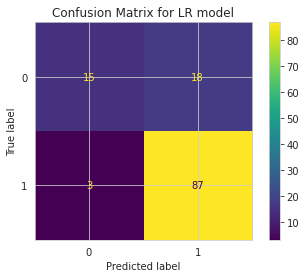

In [132]:
LR_cm = confusion_matrix(y_test, LR_y_pred)
display = ConfusionMatrixDisplay(LR_cm).plot()
plt.title(f"Confusion Matrix for LR model")
plt.show()

In [133]:
Accuracy['LogisticRegression_mutual']=accuracy_score(y_test,LR_y_pred)*100

### **Decision Tree**

In [134]:
DT_model =  DecisionTreeClassifier()
DT_model.fit(X_train, y_train)
DT_y_pred = DT_model.predict(X_test)

In [135]:

#Scoring the model on training_data
print(f'Training Accuracy\t: {DT_model.score(X_train, y_train)*100} %')

#Scoring the model on test_data
print(f'Testing Accuracy\t:  {DT_model.score(X_test, y_test)*100} %')

Training Accuracy	: 100.0 %
Testing Accuracy	:  66.66666666666666 %


In [136]:
print(classification_report(y_test, DT_y_pred))

              precision    recall  f1-score   support

           0       0.41      0.55      0.47        33
           1       0.81      0.71      0.76        90

    accuracy                           0.67       123
   macro avg       0.61      0.63      0.61       123
weighted avg       0.70      0.67      0.68       123



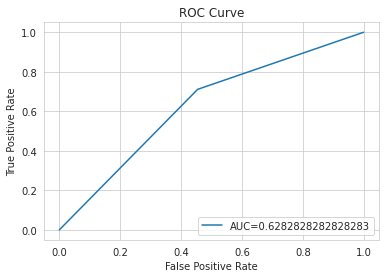

In [137]:
ROC_curve(y_test,DT_y_pred)#Area under Curve  to evaluate the quality of DT model AUC=80.95

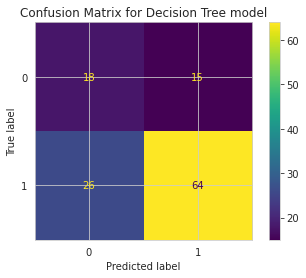

In [138]:
DT_cm = confusion_matrix(y_test, DT_y_pred)
display = ConfusionMatrixDisplay(DT_cm).plot()
plt.title(f"Confusion Matrix for Decision Tree model")
plt.show()

In [139]:
Accuracy['DecisionTree']=accuracy_score(y_test,DT_y_pred)*100

### **GaussianNB**

In [140]:
NB_model_ = GaussianNB()
NB_model_.fit(X_train, y_train)
NB_y_pred = NB_model_.predict(X_test)

In [141]:
#Scoring the model on training_data
print(f'Training Accuracy\t: {NB_model_.score(X_train, y_train)*100:.3f} %')

#Scoring the model on test_data
print(f'Testing Accuracy\t:  {NB_model_.score(X_test, y_test)*100:.3f} %')

Training Accuracy	: 78.819 %
Testing Accuracy	:  82.927 %


In [142]:
print(classification_report(y_test, NB_y_pred))

              precision    recall  f1-score   support

           0       0.83      0.45      0.59        33
           1       0.83      0.97      0.89        90

    accuracy                           0.83       123
   macro avg       0.83      0.71      0.74       123
weighted avg       0.83      0.83      0.81       123



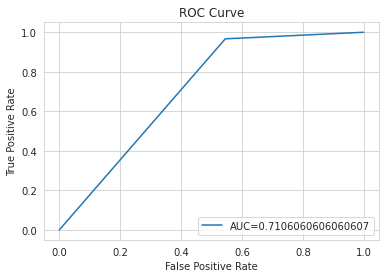

In [143]:
ROC_curve(y_test,NB_y_pred) #Area under Curve  to evaluate the quality of GaussianNB model, AUC=79.08

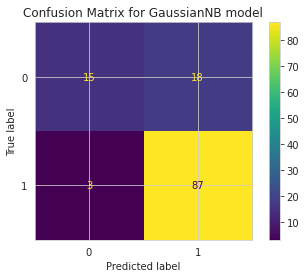

In [144]:
NB_cm_ = confusion_matrix(y_test, NB_y_pred)
display = ConfusionMatrixDisplay(NB_cm_).plot()
plt.title(f"Confusion Matrix for GaussianNB model")
plt.show()

In [145]:
Accuracy['GaussianNB']=accuracy_score(y_test,NB_y_pred)*100

### **RandomForestClassifier**

In [146]:
RFC_model = RandomForestClassifier(n_estimators=50, max_features='sqrt')
RFC_model.fit(X_train, y_train)
RFC_pred=RFC_model.predict(X_test)

In [147]:
RFC_model.feature_importances_

array([0.01801492, 0.02656306, 0.05387868, 0.0231232 , 0.02002781,
       0.20397768, 0.11589896, 0.1934172 , 0.04112553, 0.25195153,
       0.05202143])

In [148]:
df_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [149]:
features = pd.DataFrame()
features['Feature'] = X_train.columns
features['Importance'] = RFC_model.feature_importances_
features.sort_values(by=['Importance'], ascending=False, inplace=True)
features.set_index('Feature', inplace=True)

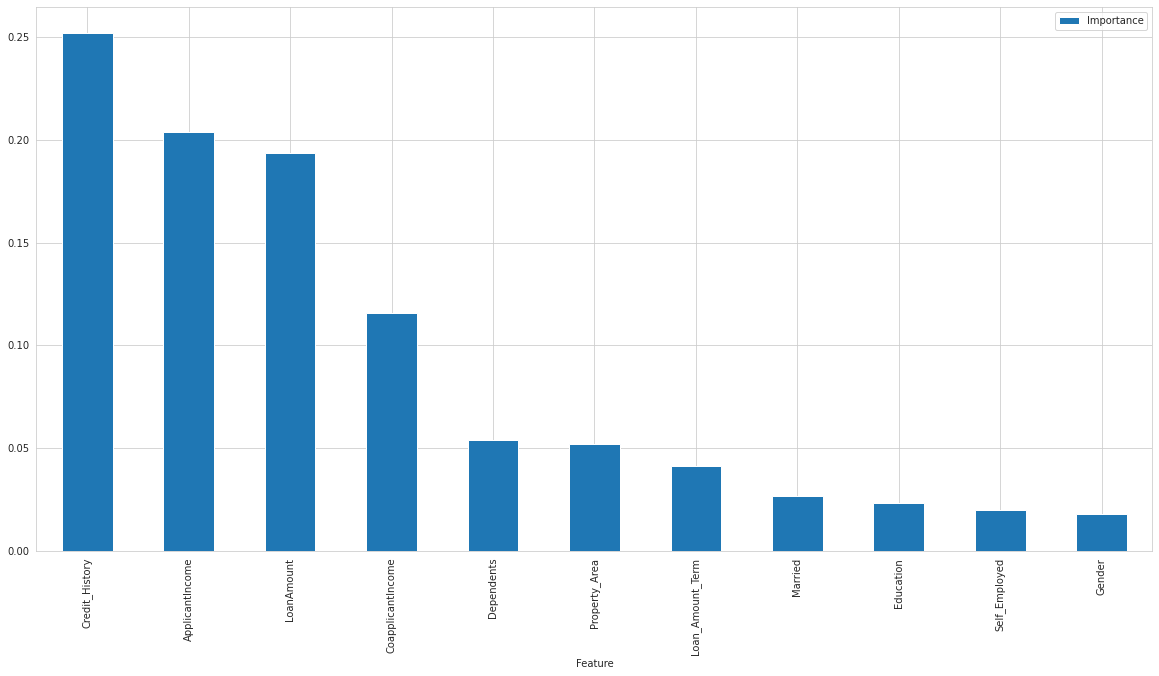

In [150]:
features.plot(kind='bar', figsize=(20, 10))

In [151]:
#Scoring the model on training_data
print(f'Training Accuracy\t: {RFC_model.score(X_train, y_train)*100:.3f} %')

#Scoring the model on test_data
print(f'Testing Accuracy\t:  {RFC_model.score(X_test, y_test)*100:.3f} %')

Training Accuracy	: 100.000 %
Testing Accuracy	:  78.862 %


In [152]:
print(classification_report(y_test, RFC_pred))

              precision    recall  f1-score   support

           0       0.65      0.45      0.54        33
           1       0.82      0.91      0.86        90

    accuracy                           0.79       123
   macro avg       0.74      0.68      0.70       123
weighted avg       0.77      0.79      0.78       123



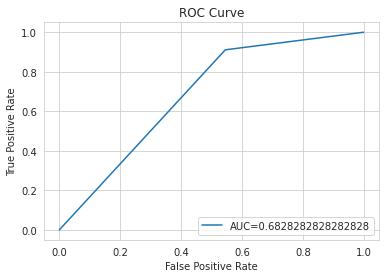

In [153]:
ROC_curve(y_test,RFC_pred) #Area under Curve  to evaluate the quality of GaussianNB model, AUC=79.08

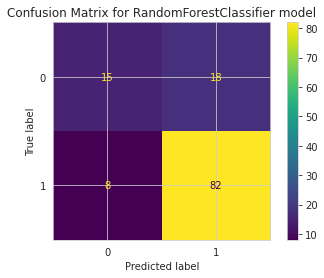

In [154]:
RFC_cm_ = confusion_matrix(y_test, RFC_pred)
display = ConfusionMatrixDisplay(RFC_cm_).plot()
plt.title(f"Confusion Matrix for RandomForestClassifier model")
plt.show()

In [155]:
Accuracy['RandomForestClassifieRandomForestClassifier']=accuracy_score(y_test,RFC_pred)*100

### **Models Summary**

In [156]:
df_model = pd.DataFrame(index=['LogisticRegression','DecisionTree','GaussianNB','RandomForestClassifier'],
                        columns=['Accuracy'])
df_model['Accuracy'] = Accuracy.values()


df_model


,Accuracy
LogisticRegression,82.926829
DecisionTree,66.666667
GaussianNB,82.926829
RandomForestClassifier,78.861789


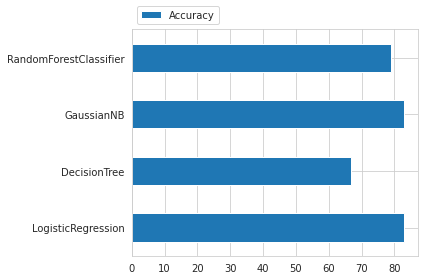

In [157]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(['LogisticRegression','DecisionTree','GaussianNB']), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 10}
)
plt.tight_layout()